In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [5]:
data = pd.read_csv('johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv')

In [6]:
data.head()

,country_region,last_update,lat,long,confirmed,deaths,recovered,active
0,Australia,2020-03-31 18:38:01,-25.0000,133.0000,4559,18,358,4183
1,Austria,2020-03-31 18:31:40,47.5162,14.5501,10122,128,1095,8899
2,Canada,2020-03-31 18:37:46,60.0010,-95.0010,8180,95,1020,0
3,China,2020-03-31 13:54:04,30.5928,114.3055,82278,3309,76206,2763
4,Denmark,2020-03-31 18:31:40,56.0000,10.0000,3039,90,77,2872


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_region  180 non-null    object 
 1   last_update     180 non-null    object 
 2   lat             180 non-null    float64
 3   long            180 non-null    float64
 4   confirmed       180 non-null    int64  
 5   deaths          180 non-null    int64  
 6   recovered       180 non-null    int64  
 7   active          180 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 11.4+ KB


In [8]:
data["country_region"].value_counts()

Papua New Guinea      1
Canada                1
West Bank and Gaza    1
Equatorial Guinea     1
Portugal              1
                     ..
Czechia               1
Jamaica               1
Burkina Faso          1
Slovakia              1
Sierra Leone          1
Name: country_region, Length: 180, dtype: int64

In [9]:
data.country_region.unique()

array(['Australia', 'Austria', 'Canada', 'China', 'Denmark', 'Finland',
       'France', 'Germany', 'Iceland', 'Ireland', 'Italy', 'Netherlands',
       'Norway', 'Russia', 'Sweden', 'Switzerland', 'United Kingdom',
       'US', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswat

In [10]:
data.loc[data['country_region']=='US']

,country_region,last_update,lat,long,confirmed,deaths,recovered,active
17,US,2020-03-31 18:31:52,40.0,-100.0,177452,3440,6038,0


In [11]:
data.iloc[17]

country_region                     US
last_update       2020-03-31 18:31:52
lat                                40
long                             -100
confirmed                      177452
deaths                           3440
recovered                        6038
active                              0
Name: 17, dtype: object

In [12]:
data.describe()

,lat,long,confirmed,deaths,recovered,active
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,20.670472,16.719862,4655.894444,229.227778,976.316667,2477.911111
std,23.627291,58.061782,19180.379675,1211.465970,6202.193121,9420.807609
min,-40.900600,-102.552800,1.000000,0.000000,0.000000,0.000000
25%,6.105887,-7.825200,15.750000,0.000000,0.000000,13.750000
50%,19.413735,18.687850,180.500000,2.500000,9.500000,153.500000
75%,41.247658,44.019018,1067.500000,17.250000,52.000000,781.250000
max,64.963100,178.065000,177452.000000,12428.000000,76206.000000,77635.000000


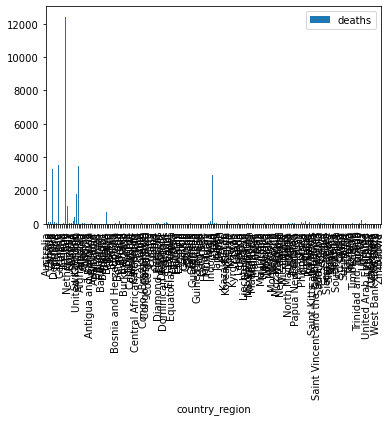

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
df.plot(kind='bar',x='country_region',y='deaths')
plt.show()

In [14]:
new_df = df[df.deaths > 50]

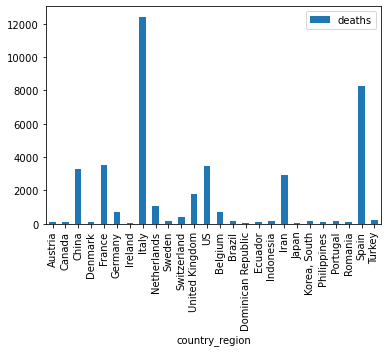

In [15]:
new_df.plot(kind='bar',x='country_region',y='deaths')
plt.show()

In [16]:
states_df = pd.DataFrame(pd.read_csv('johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv'))

In [17]:
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fips            57 non-null     float64
 1   province_state  137 non-null    object 
 2   country_region  137 non-null    object 
 3   last_update     55 non-null     object 
 4   lat             137 non-null    float64
 5   long            137 non-null    float64
 6   confirmed       137 non-null    int64  
 7   deaths          137 non-null    int64  
 8   recovered       137 non-null    int64  
 9   active          137 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 10.8+ KB


In [18]:
us_df = states_df[states_df.country_region == 'US']

In [19]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fips            57 non-null     float64
 1   province_state  58 non-null     object 
 2   country_region  58 non-null     object 
 3   last_update     55 non-null     object 
 4   lat             58 non-null     float64
 5   long            58 non-null     float64
 6   confirmed       58 non-null     int64  
 7   deaths          58 non-null     int64  
 8   recovered       58 non-null     int64  
 9   active          58 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 5.0+ KB


In [20]:
us_df.deaths.unique()

array([  15,    3,   20,    7,  150,   51,   36,    0,    9,   77,  102,
          2,    8,   74,   48,    6,   11,  185,    5,   18,   56,   12,
         14,  198,    4, 1550,   10,   40,   23,   16,   63,    1,   49,
        222,   24])

In [21]:
us_df.deaths.describe()

count      58.000000
mean       59.310345
std       206.136831
min         0.000000
25%         4.000000
50%        12.000000
75%        39.000000
max      1550.000000
Name: deaths, dtype: float64

In [22]:
us_df.head()

,fips,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
0,1.0,Alabama,US,2020-03-31 18:31:52,32.3182,-86.9023,949,15,0,0
1,2.0,Alaska,US,2020-03-31 18:31:52,61.3707,-152.4044,119,3,0,0
2,4.0,Arizona,US,2020-03-31 18:31:52,33.7298,-111.4312,1158,20,0,0
3,5.0,Arkansas,US,2020-03-31 18:31:52,34.9697,-92.3731,508,7,0,0
4,6.0,California,US,2020-03-31 18:31:52,36.1162,-119.6816,7477,150,0,0


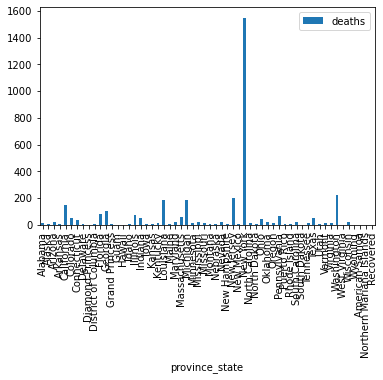

In [23]:
us_df.plot(kind='bar',x='province_state',y='deaths')
plt.show()

In [24]:
us_deaths = us_df[us_df.deaths > 10]

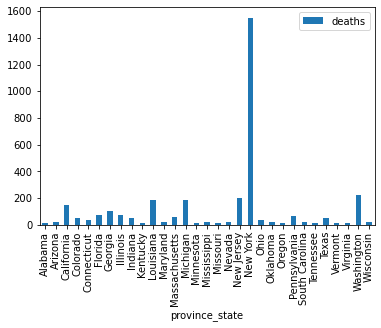

In [25]:
us_deaths.plot(kind='bar',x='province_state',y='deaths')
plt.show()

In [26]:
crowd_sourced_df = pd.read_csv('crowd-sourced-covid-19-testing-locations.csv')

In [27]:
crowd_sourced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   location_id                                           4159 non-null   object 
 1   is_verified                                           4159 non-null   object 
 2   is_hidden                                             4159 non-null   object 
 3   is_location_screening_patients                        4120 non-null   object 
 4   is_location_collecting_specimens                      4152 non-null   object 
 5   location_name                                         4159 non-null   object 
 6   location_address_street                               4159 non-null   object 
 7   location_address_locality                             4159 non-null   object 
 8   location_address_region                               4159

In [28]:
crowd_sourced_df.head()

,location_id,is_verified,is_hidden,is_location_screening_patients,is_location_collecting_specimens,location_name,location_address_street,location_address_locality,location_address_region,location_address_postal_code,...,is_location_only_testing_patients_that_meet_criteria,is_location_by_appointment_only,location_contact_phone_appointments,location_contact_url_appointments,location_specific_testing_criteria,additional_information_for_patients,data_source,is_ready_for_prod,location_address_district,geometry
0,a3b3214a-e128-4c68-ac18-a467482f1ab8,t,f,t,t,Providence Alaska Medical Center,3200 Providence Drive,Anchorage,AK,99508.0,...,t,t,907-562-2211,https://virtual.providence.org/,https://www.providence.org/patients-and-visito...,NaN,provider website,NaN,NaN,POINT (-149.81894 61.189842)
1,823ece97-d901-4dd6-9a4e-b5a86d61230e,t,f,f,f,State of Alaska Health and Social Services,3601 C Street,Anchorage,AK,99811.0,...,t,t,1-800-499-2964,NaN,NaN,We serve 280 small communities and villages. I...,provider website,NaN,NaN,POINT (-149.88658 61.18746)
2,f15df801-b396-45d7-b689-c0cc7fca3e0b,t,f,t,t,Jessie Norma Jim Health Center,725 Relay Road,Angoon,AK,99820.0,...,t,t,907-966-8799,NaN,https://covid19.searhc.org/,"For questions, please call 966.8799 (7 am - 4 ...",provider website,NaN,NaN,POINT (-134.5802606 57.499091)
3,ff18e912-fe0f-4823-a4cb-698e3f92a345,t,f,t,t,Bethel Center and Itinerant Nursing Services,1490 State Hwy,Bethel,AK,99559.0,...,t,t,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-161.7696992 60.7927467)
4,372769c0-2497-4353-8a4f-035e9e575852,t,f,t,t,Craig Public Health Center,1800 Craig Klawock Highway,Craig,AK,99921.0,...,t,t,NaN,NaN,NaN,NaN,provider website,NaN,NaN,POINT (-133.1254048 55.4840003)


In [29]:
crowd_sourced_df.groupby(['location_address_region']).size()

location_address_region
AK               41
AL               74
AZ                3
Arizona          34
Arkansas         46
                 ..
WA               90
WI               15
West Virginia    64
Wisconsin        76
Wyoming          30
Length: 76, dtype: int64

In [30]:
test_centers_df = crowd_sourced_df.groupby(['location_address_region']).size().reset_index(name='counts')

In [31]:
test_centers_df.head()

,location_address_region,counts
0,AK,41
1,AL,74
2,AZ,3
3,Arizona,34
4,Arkansas,46


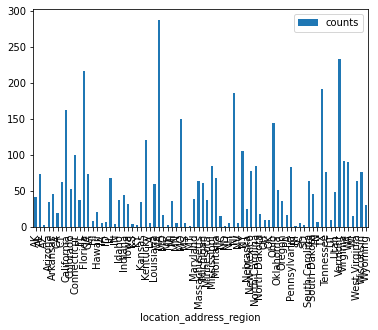

In [32]:
test_centers_df.plot(kind='bar',x='location_address_region',y='counts')
plt.show()

In [33]:
test_centers_df.describe()

,counts
count,76.000000
mean,54.723684
std,59.308819
min,1.000000
25%,8.750000
50%,37.500000
75%,74.500000
max,288.000000


In [34]:
test_centers_df[test_centers_df['counts']==288]

,location_address_region,counts
28,MA,288


In [35]:
test_centers_df[test_centers_df['counts']==1]

,location_address_region,counts
35,MT,1
43,ND,1
59,RI,1


In [36]:
test_centers_df[test_centers_df['location_address_region']=='NY']

,location_address_region,counts
47,NY,106


In [37]:
us_deaths[us_deaths['province_state']=='New York']

,fips,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
35,36.0,New York,US,2020-03-31 18:31:52,42.1657,-74.9481,75795,1550,0,0


In [38]:
test_centers_df[test_centers_df['location_address_region']=='MA']

,location_address_region,counts
28,MA,288


In [39]:
us_deaths[us_deaths['province_state']=='Massachusetts']

,fips,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
24,25.0,Massachusetts,US,2020-03-31 18:31:52,42.2302,-71.5301,5752,56,0,0


In [40]:
us_deaths.head()

,fips,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
0,1.0,Alabama,US,2020-03-31 18:31:52,32.3182,-86.9023,949,15,0,0
2,4.0,Arizona,US,2020-03-31 18:31:52,33.7298,-111.4312,1158,20,0,0
4,6.0,California,US,2020-03-31 18:31:52,36.1162,-119.6816,7477,150,0,0
5,8.0,Colorado,US,2020-03-31 18:31:52,39.0598,-105.3111,2627,51,0,0
6,9.0,Connecticut,US,2020-03-31 18:31:52,41.5978,-72.7554,2571,36,0,0


In [41]:
us_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fips            31 non-null     float64
 1   province_state  31 non-null     object 
 2   country_region  31 non-null     object 
 3   last_update     31 non-null     object 
 4   lat             31 non-null     float64
 5   long            31 non-null     float64
 6   confirmed       31 non-null     int64  
 7   deaths          31 non-null     int64  
 8   recovered       31 non-null     int64  
 9   active          31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.7+ KB


In [42]:
test_centers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location_address_region  76 non-null     object
 1   counts                   76 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [43]:
test_centers_df

,location_address_region,counts
0,AK,41
1,AL,74
2,AZ,3
3,Arizona,34
4,Arkansas,46
...,...,...
71,WA,90
72,WI,15
73,West Virginia,64
74,Wisconsin,76


In [44]:
res = requests.get("https://www.worldometers.info/coronavirus/").text

In [45]:
# df = pd.read_html(res.text,header=0)[0]

res = re.sub(r'<.*?>', lambda g: g.group(0).upper(), res)
df=pd.read_html(res,header=0)[0]

ImportError: lxml not found, please install it

In [ ]:
df

In [ ]:
df.head(20)

In [ ]:
df.info()

In [ ]:
df[df['Country,Other']=='USA']

In [ ]:
df.plot(x="Country,Other",y=["TotalCases","TotalTests"],kind='bar')

In [ ]:
df_cases_200000 = df[df.TotalCases > 200000]

In [ ]:
df_cases_200000.plot(x="Country,Other",y=["TotalCases","TotalTests"],kind='bar')

In [ ]:
df.tail(10)

In [ ]:
df.drop(df.tail(8).index,inplace=True)

In [ ]:
df.tail(10)

In [ ]:
df_cases_200000 = df[df.TotalCases > 200000]
df1_cases_200000 = df[df.TotalCases > 200000]

In [ ]:
df_cases_200000.plot(x="Country,Other",y=["TotalCases"],kind='bar')

In [ ]:
world = df[ df['Country,Other'] == 'World' ] 
df = df.drop(world.index, axis=0)

In [ ]:
df_cases_200000 = df[df.TotalCases > 200000]
df_cases_200000.plot(x="Country,Other",y=["TotalCases"],kind='bar')

In [ ]:
df_cases_200000.plot(x="Country,Other",y=["TotalCases","TotalTests"],kind='bar')

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(df_cases_200000,x="Country,Other",y="TotalCases")

In [ ]:
fig.show()

In [ ]:
fig1 = px.bar(df_cases_200000,x="Country,Other",y="TotalDeaths")
fig1.show()

In [ ]:
data = [df['TotalCases'],df['TotalDeaths']]
fig2 = px.bar(df_cases_200000,x="Country,Other",y="TotalCases",color="TotalDeaths",barmode="group")
fig2.show()

In [ ]:
import plotly.graph_objects as go
country=df_cases_200000['Country,Other']

fig = go.Figure(data=[
    go.Bar(name='TotalCases', x=country, y=df_cases_200000['TotalCases']),
    go.Bar(name='TotalDeaths', x=country, y=df_cases_200000['TotalDeaths'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
df_cases_200000.describe()